# Exercise

This exercise uses the temperature data sets from Kiel and Antarctica again. 

DATA SET 1: Average daily temperature in Kiel Holtenau from 1.06.1986 until 31.12.2022 in °C <br>
DATA SET 2: Maximum daily temperature in Antarctica from 1.1.1989 until 17.4.2023 in °C

In [1]:
# this imports the python module numpy, which is necessary to load the data. We'll get to that later! 
import numpy as np

# Uncomment the following two lines if you want to look at Kiel temperatures
#infile = "../../data/T-Holtenau/data/data_OBS_DEU_P1D_T2M_2564.csv"
#temperature=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=3).tolist()

# Uncomment the following two lines if you want to look at Antarctica temperatures
#infile = "uedata/IDCJAC0010_300017_1800_Data.csv"
#temperature=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=5).tolist()

# make up temperature data
# ------------------------
#dt = 1                                       # sampling interval (days)
#total_days = 365*40                          # days in the record
#t = np.arange(0, total_days+dt, dt)          # time array
#avg_temp = 15                                # average temperature
#temp_ampl = 10                               # temperature variation over the year
#trend = 0.00075 * t                          # temperature trend
#mu, sigma = 0, 1.5                           # mean and standard deviation for random noise
#noise = np.random.normal(mu, sigma, len(t))  # random noise

#temperature = avg_temp + temp_ampl*np.cos((2*np.pi/365)*t) + trend + noise

# read data from local drive
# --------------------------
infile = "data/data_OBS_DEU_P1D_T2M_2564.csv"
temperature=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=3).tolist()

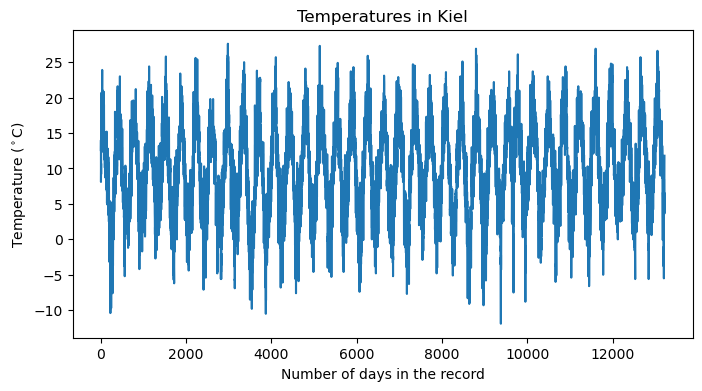

In [2]:
# Here is some code for a simple plot of the temperatures

# Import the python module matplotlib needed for creating figures
import matplotlib.pyplot as plt

# define figure
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(temperature)

# add x and y axes annotation
plt.xlabel('Number of days in the record')
plt.ylabel('Temperature ($^\circ$C)')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Temperatures in Kiel')
#plt.title('Temperatures in Antarctica')

# command to only show the plot, nothing else
plt.show()

## 1. Temperature gradients

Rapid temperature changes are a challenge for our bodies and also for the ecosystem. Answer the following questions: 
-  What was the maximum absolute temperature change? 
-  What was the average absolute temperature change? 
-  In what months do the most drastic changes usually happen? 

You can find out with the temperature gradient. Calculate the gradient (or first derivative) from the temperature data with the help of a loop. 

*Hints:* <br>
*- The command `np.abs()` gives the absolute value of a number*<br>
*- Define an empty list, e.g. `emptylist = []`*<br>
*- Remember the `list.append` function*<br>
*- Depending on the loop you choose you may need to set the initial 'counter' variable*<br>
*- Make use of your code from the previous exercise to determine the month*


In [3]:
# define arrays in length of temperature -1
# -----------------------------------------
t_change_loop = np.zeros(len(temperature)-1)
t_change_vec  = np.zeros(len(temperature)-1)

In [5]:
%%time
# compute temperature change between two consecutive days in for-loop
# -------------------------------------------------------------------
for i in range(len(temperature)-1):
    t_change_loop[i] = np.abs(temperature[i] - temperature[i+1])

CPU times: user 25.6 ms, sys: 911 µs, total: 26.5 ms
Wall time: 26.9 ms


In [6]:
%%time
# compute temperature change between two consecutive days without for-loop
# ------------------------------------------------------------------------
temp_zero = np.append([[temperature]], [[0.]])
zero_temp = np.append([[0.]], [[temperature]])
t_change_vec = np.abs(zero_temp - temp_zero)[1:-1]

CPU times: user 5.6 ms, sys: 1.04 ms, total: 6.64 ms
Wall time: 5.76 ms


Der größte Temperaturunterschied waren 10.9 °C zwischen den Tagen 3088 und  3089
Der durchschnittliche Temperaturunterschied war 1.6 °C
Die 10 größten Änderungen waren in den Monaten (absteigend) [11.  8. 12.  9. 11.  5.  6. 12. 12.  1.]


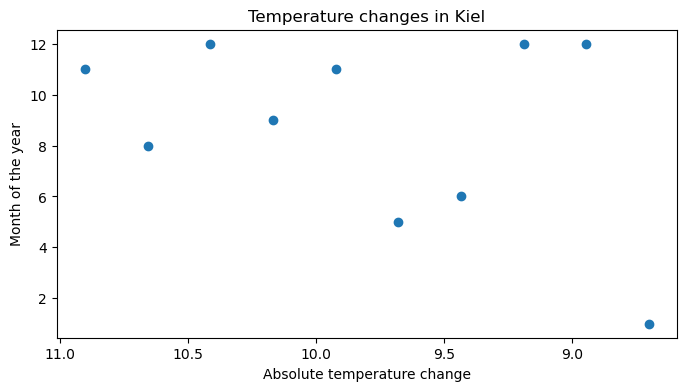

In [7]:
# What was the maximum absolute temperature change?
# -------------------------------------------------
max_value = np.amax(t_change_vec)
max_index = np.argmax(t_change_vec)

print('Der größte Temperaturunterschied waren', np.round(max_value, decimals=2), '°C zwischen den Tagen',
      max_index+1, 'und ', max_index+2)

# What was the average absolute temperature change?
# -------------------------------------------------
avg_t_change = np.mean(t_change_vec)

print('Der durchschnittliche Temperaturunterschied war', np.round(avg_t_change, decimals=2), '°C')

# In what months do the most drastic changes usually happen?
# ----------------------------------------------------------
sorted_indices = np.argsort(t_change_vec)[::-1] # sort indices of t_change from big to small
day_of_year = sorted_indices % 365.25           # turn indices to days within the year
month_of_year = day_of_year // (365.25/12)      # turn days within the year to month
month_of_year = month_of_year + 6               # add 6 months because time series starts in June

# after adding 6, turn 13 to 1, 14 to 2, ...
# ------------------------------------------
month_of_year = np.where(month_of_year==13., 1., month_of_year)
month_of_year = np.where(month_of_year==14., 2., month_of_year)
month_of_year = np.where(month_of_year==15., 3., month_of_year)
month_of_year = np.where(month_of_year==16., 4., month_of_year)
month_of_year = np.where(month_of_year==17., 5., month_of_year)

print('Die 10 größten Änderungen waren in den Monaten (absteigend)', month_of_year[:10])

# add x_axis for plot
# -------------------
n_points = 10
x_axis = np.linspace(max(t_change_vec[sorted_indices[:n_points]]), min(t_change_vec[sorted_indices[:n_points]]),
                     n_points)

# plot months and changes
# -----------------------
# define figure
fig=plt.figure(figsize=(8,4))

# plot data
plt.scatter(x_axis, month_of_year[:n_points])
plt.gca().invert_xaxis()

# add x and y axes annotation
plt.xlabel('Absolute temperature change')
plt.ylabel('Month of the year')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Temperature changes in Kiel')

# command to only show the plot, nothing else
plt.show()

### Optional
Plot the temperature gradient making use of the code provided above. Use appropriate axis labels and title. 

## 2. Unusual years 

Kiel: Extreme cold in 2010, heat wave in 2014, ... Some years had unusual temperatures. Identify these years! 

Steps (suggestion): 
-  Subdivide the temperature data into single years with the help of a loop. 
-  Consider that some years have 366 days, for example with the help of an if statement. 
-  Do the same for the gradient data (note that you have one entry less). 
-  Create a list with the years covered in your data set. 
-  Identify the max, min, average temperatures of each year using a loop and store them in new lists. 
-  Identify the max and the average absolute temperature change of each year and store in new lists. 
-  Identify *unusual* years and explain what was unusual. 

In [8]:
# comupte days in 1986
# --------------------
days_1986 = 30+31+31+30+31+30+31  # days form 01.06.1986 to 31.12.1986

# set up counter of days and years
# --------------------------------
days_so_far = days_1986 
year = 1986

# seperate data of year 1986 (only half the year)
# -----------------------------------------------
temperature_1986 = temperature[:days_1986]
gradient_1986 = t_change_vec[:days_1986-1]
np.savetxt('data/data_each_year/temperature_' + str(year) + '.txt', temperature_1986, delimiter=',')
np.savetxt('data/data_each_year/gradient_' + str(year) + '.txt', gradient_1986, delimiter=',')

# get number of years
# -------------------
n_years = 2022-1986

# create list of all years and lists for max/avg/min temp as well as max/avg grad
# -------------------------------------------------------------------------------
all_years = np.arange(1986, 2022+1, 1)
max_temps = np.zeros(len(all_years))
avg_temps = np.zeros(len(all_years))
min_temps = np.zeros(len(all_years))
max_grad = np.zeros(len(all_years))
avg_grad = np.zeros(len(all_years))

# get values for 1986
# -------------------
max_temps[0] = np.max(temperature_1986)
avg_temps[0] = np.mean(temperature_1986)
min_temps[0] = np.min(temperature_1986)
max_grad[0] = np.max(gradient_1986)
avg_grad[0] = np.mean(gradient_1986)


for i in range(n_years):
    # increase year counter
    # ---------------------
    year += 1
    
    # check if 366 days
    # -----------------
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):  # if 366 days
        # slice temp and grad array to current year and safe as txt
        # ---------------------------------------------------------
        temp = temperature[days_so_far:days_so_far+366]
        grad = t_change_vec[days_so_far:days_so_far+366]
        np.savetxt('data/data_each_year/temperature_' + str(year) + '.txt', temp, delimiter=',')
        np.savetxt('data/data_each_year/gradient_' + str(year) + '.txt', grad, delimiter=',')
        
        # save max/min/avg values for current year
        # ----------------------------------------
        max_temps[i+1] = np.max(temp)
        avg_temps[i+1] = np.mean(temp)
        min_temps[i+1] = np.min(temp)
        max_grad[i+1] = np.max(grad)
        avg_grad[i+1] = np.mean(grad)
        
        # increase days counter
        # ---------------------
        days_so_far += 366
        
    # if not 366 days
    # ---------------
    else:
        # slice temp and grad array to current year and safe as txt
        # ---------------------------------------------------------
        temp = temperature[days_so_far:days_so_far+365]
        grad = t_change_vec[days_so_far:days_so_far+365]
        np.savetxt('data/data_each_year/temperature_' + str(year) + '.txt', temp, delimiter=',')
        np.savetxt('data/data_each_year/gradient_' + str(year) + '.txt', grad, delimiter=',')
        
        # save max/min/avg values for current year
        # ----------------------------------------
        max_temps[i+1] = np.max(temp)
        avg_temps[i+1] = np.mean(temp)
        min_temps[i+1] = np.min(temp)
        max_grad[i+1] = np.max(grad)
        avg_grad[i+1] = np.mean(grad)
        
        # increase days counter
        # ---------------------
        days_so_far += 365

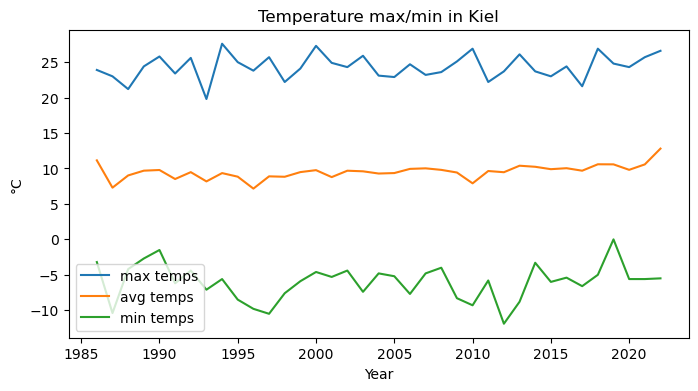

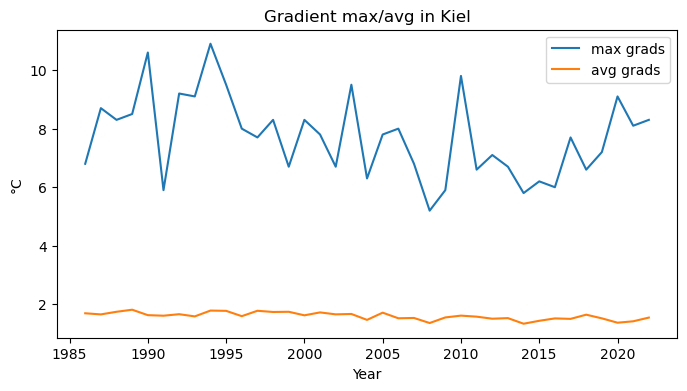

In [9]:
# define figure for temp
# ----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_temps, label='max temps')
plt.plot(all_years, avg_temps, label='avg temps')
plt.plot(all_years, min_temps, label='min temps')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Temperature max/min in Kiel')

# command to only show the plot, nothing else
plt.show()

# define figure for grad
# -----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_grad, label='max grads')
plt.plot(all_years, avg_grad, label='avg grads')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Gradient max/avg in Kiel')

# command to only show the plot, nothing else
plt.show()